# Analyzing Results of `math_dataset` experiments

## Set up

In [1]:
import sys; sys.path.append('../..')
import numpy as np
import matplotlib.pyplot as plt

from data_utils import q_text_vectorizer, a_text_vectorizer, load_dataset, invert_seq_vector
from model_utils import fetch_model, recompile_model, autoregressive_predict

/gpfs/gibbs/project/lafferty/ma2393/conda_envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-09-10 18:54:09.371005: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-10 18:54:09.377148: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-10 18:54:09.419462: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-10 18:54:09.420404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions

In [2]:
def eval_model(artifact_path, val_ds, artifact_root_dir='model_artifacts', q_text_vectorizer=q_text_vectorizer, a_text_vectorizer=a_text_vectorizer):
    model = fetch_model(artifact_path, artifact_root_dir)
    model = recompile_model(model, a_text_vectorizer)

    print('evaluation on val_ds')
    print(model.evaluate(val_ds, return_dict=True))

    (source, target), label = next(iter(val_ds.take(1)))
    source, target, label = np.array(source), np.array(target), np.array(label)

    print()
    print(f'evaluating full-sequence accuracy on a single batch of size {len(source)}')
    preds = autoregressive_predict(model, source, target)
    full_seq_acc = np.mean(np.all(preds == label, axis=1))
    print(f'full_seq_acc: {full_seq_acc}')

    print('acc by position')
    acc_by_pos = np.mean(preds == label, axis=0)
    plt.plot(acc_by_pos)

    print()
    print('sample of predictions:')
    samples = np.random.choice(len(source), size=5, replace=False)
    for s, t, p, l in zip(source[samples], target[samples], preds[samples], label[samples]):
        print()
        print(f'Q: {invert_seq_vector(s, q_text_vectorizer)}')
        print(f'A: {invert_seq_vector(l, a_text_vectorizer)}')
        print(f'P: {invert_seq_vector(p, a_text_vectorizer)}')

## `polynomials__expand`

In [8]:
# region
task = 'polynomials__expand'
train_ds, val_ds = load_dataset(task, train_size=-1, batch_size=512)
# endregion

### Transformer - Medium

In [9]:
eval_model('awni00/math-polynomials__expand/model-volcanic-brook-31:latest', val_ds)

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 8s 357ms/step - loss: 0.2375 - teacher_forcing_accuracy: 0.7705
{'loss': 0.23749572038650513, 'teacher_forcing_accuracy': 0.7705138325691223}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.025390625
acc by position

sample of predictions:

Q: Expand -1345*c**3 + 406*c**3 - 868*c**3 + (-1 - 4 + 3)*(-3*c**3 + 4*c**3 - 2*c**3) + c**3 - 2*c + 2*c.
A: -1804*c**3;
P: -1479*c**3;

Q: Expand (8*k + 5*k - 6*k)*(0 - 1 + 2) + 282 - 145 + 67*k - 137.
A: 74*k;
P: 67*k - 1;

Q: Expand (2*r**2 + 0*r**2 - r**2)*(0*r + 3*r - r) - 70 - 3*r + 32 + r**2 + 36 - 21*r**3.
A: -19*r**3 + r**2 - 3*r - 2;
P: -22*r**3 + r**2 + 2;

Q: Expand (c + 4*c - c)*(0 + 0 - 2*c + 0 + 0 - c + (2*c - 3 + 3)*(0 - 4 + 2) + 4 - 4 - c - 1 - 2*c + 1 + 0 + 0 - 2*c)*(-39*c**2 + 12*c**2 + 3*c**2).
A: 1152*c**4;
P: -108*c**4;

Q: Expand (-110 + 899 + 2408 + 13)*(l**2 - l**2 - 4*l**2).
A: -12840*l**2;
P: -10440*l**2;


### Relational Abstractor - Medium

In [10]:
eval_model('awni00/math-polynomials__expand/model-brisk-terrain-28:latest', val_ds)

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 17s 833ms/step - loss: 0.1761 - teacher_forcing_accuracy: 0.8216
{'loss': 0.17611607909202576, 'teacher_forcing_accuracy': 0.8215845227241516}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.052734375
acc by position

sample of predictions:

Q: Expand (-6*k - k + 0*k)*(24*k**3 + 365*k - 364*k - 5*k**3).
A: -133*k**4 - 7*k**2;
P: -174*k**4 - 14*k**2;

Q: Expand (0*o**2 + 0*o**2 - 2*o**2)*(9*o**3 + 4*o**3 + o**3) - 4*o + 4*o + o**5 + 12*o**5 - 4*o**5 + 12*o**5.
A: -7*o**5;
P: -13*o**5;

Q: Expand (-2*y**4 + 3*y**4 - 2*y**4)*(-19*y + 1895*y - 1179*y).
A: -697*y**5;
P: -479*y**5;

Q: Expand -k**2 + 0*k + 0*k + (205*k - 285*k - 489*k)*(0 + 0 - 2)*(2 - 1 + 2)*(-2*k + 3*k - 3*k).
A: -6829*k**2;
P: -2779*k**2;

Q: Expand (31 - 9 + 7)*(0 + 0 - 2)*(58*u**4 - 11*u**4 - 19*u**4).
A: -1624*u**4;
P: -1020*u**4;


### Relational Abstractor2 - Medium

In [11]:
# eval_model('awni00/math-polynomials__expand/model-soft-moon-15:latest', val_ds)

## `polynomials__coefficient_named`

In [12]:
# region
task = 'polynomials__coefficient_named'
train_ds, val_ds = load_dataset(task, train_size=-1, batch_size=512)
# endregion

### Transformer - Medium

In [13]:
eval_model('awni00/math-polynomials__coefficient_named/model-cool-wave-19:latest', val_ds)

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 8s 365ms/step - loss: 0.1573 - teacher_forcing_accuracy: 0.5476
{'loss': 0.15734028816223145, 'teacher_forcing_accuracy': 0.5476008653640747}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.16796875
acc by position

sample of predictions:

Q: Rearrange ((2 + 0 - 3)*(-202 - 101 + 204) + 2 - 4 + 3)*(11*z**2 + 2*z**2 + 7*z**2 + 2*z)*(-4*z + 2*z + 4*z) to s*z**3 + g*z + x + b*z**2 and give b.
A: 400;
P: -108;

Q: Rearrange (-9*q**2 - 360*q + 360*q)*(-19 + 4*q**2 + 19) + 23 - q**4 - 2*q**2 - 13 - 8 to the form x*q**4 + i + y*q + t*q**2 + h*q**3 and give t.
A: -2;
P: -13;

Q: Rearrange (4603*n - 9871*n + 4409*n)*(1 + 0 + 0) + 2*n + 3*n - 4*n to the form d + o*n and give o.
A: -858;
P: -106;

Q: Express -2*o + 36 - 4 - 2*o**2 + 33 - 3*o**2 + 3*o**2 - 4*o**3 in the form t*o**3 + q + c*o**2 + v*o and give t.
A: -4;
P: -2;

Q: Express -a + 5*a - 3*a - 6*a + a + 6*a + 6*a - 3*a + 2*a + (-2 + 2 + 2)*(0*a

### Transformer - Medium+

In [15]:
eval_model('awni00/math-polynomials__coefficient_named/model-eternal-cherry-20:latest', val_ds)

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 12s 566ms/step - loss: 0.1510 - teacher_forcing_accuracy: 0.5592
{'loss': 0.15103159844875336, 'teacher_forcing_accuracy': 0.5591743588447571}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.14453125
acc by position

sample of predictions:

Q: Rearrange (22*r + 23*r - 3*r)*(-14*r**2 + 15*r**2 + 6*r**2) - 9*r + 8*r**3 + 9*r to b*r**3 + z*r + s + k*r**2 and give b.
A: 302;
P: -1;

Q: Express -438*z - 1045*z - 1259*z + 129*z as i + c*z and give c.
A: -2613;
P: -2695;

Q: Rearrange 100 - 2114*n - 2*n**2 + 1060*n + 1053*n - 2*n**2 + 3*n**2 to k*n**2 + o*n + h and give h.
A: 100;
P: -2;

Q: Express -696 + 7*b + 696 + (0*b - b + 0*b)*(-2 + 6 - 3) - 2*b + 0*b + 0*b + b + 7*b - 2*b + 0*b + b + 3*b in the form t*b + k and give k.
A: 0;
P: 10;

Q: Rearrange -39 + 7898*g**2 - 30 + 0 - g**4 - 7901*g**2 + g**3 to the form x*g**3 + p*g**2 + c*g + a*g**4 + o and give p.
A: -3;
P: -1;


### Relational Abstractor - Medium

In [16]:
eval_model('awni00/math-polynomials__coefficient_named/model-decent-water-16:latest', val_ds)

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 17s 824ms/step - loss: 0.1349 - teacher_forcing_accuracy: 0.5989
{'loss': 0.13487158715724945, 'teacher_forcing_accuracy': 0.5988508462905884}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.1796875
acc by position

sample of predictions:

Q: Rearrange -4*p**4 + 2*p**4 - 9*p**3 - p**2 + 11*p**3 - 11*p**3 + p + 8 to c*p**4 + t*p**2 + u*p + v + n*p**3 and give t.
A: -1;
P: -1;

Q: Rearrange (3 - 3 + 12*l)*(-14 - 25 - 4) + (2 - 1 + 0)*(-2*l + 6 - 6) to h*l + o and give h.
A: -518;
P: -119;

Q: Express -12*c + 119*c**2 - c - 19 - 2*c + 9 - 120*c**2 as s + t*c + g*c**2 and give g.
A: -1;
P: -13;

Q: Express 118 - 4*w + 126 + w**4 + w**3 + 6*w - 242 - 9*w**2 in the form d + q*w + k*w**2 + v*w**4 + b*w**3 and give d.
A: 2;
P: -9;

Q: Express (2*z**4 + z**4 - 5*z**4)*(4 + 8 + 0 + ((1 - 3 + 0)*(2 - 2 + 1) - 2 - 1 + 10)*(3 + 3 + 1)) in the form j*z**4 + d*z**3 + r*z**2 + p + h*z and give j.
A: -94;
P: 

### Relational Abstractor2 - Medium

In [17]:
# eval_model('awni00/math-polynomials__coefficient_named/model-cosmic-lake-3:v32', val_ds)

## `polynomials__add`

In [3]:
# region
task = 'polynomials__add'
train_ds, val_ds = load_dataset(task, train_size=-1, batch_size=512)
# endregion

### Transformer - medium

In [20]:
eval_model('awni00/math-polynomials__add/model-icy-galaxy-33:latest', val_ds)

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 8s 366ms/step - loss: 0.1321 - teacher_forcing_accuracy: 0.8417
{'loss': 0.13207565248012543, 'teacher_forcing_accuracy': 0.8417012095451355}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.08984375
acc by position

sample of predictions:

Q: Let f(a) = -17*a + 3. Let o(b) = -b + 13. Give -f(t) + 2*o(t).
A: 15*t + 23;
P: 15*t - 1;

Q: Let k(m) = 12*m + 39. Let b(d) = -d - 9. Calculate -2*b(y) - k(y).
A: -10*y - 21;
P: 10*y - 3;

Q: Let n(l) = -l**2 - 6*l + 1. Let g(r) = 48*r**2 + 2 - 11*r + 44*r**2 - 94*r**2. Let z(d) = 6*g(d) - 11*n(d). Let t(s) = s**3 - 6. Give -t(c) - 6*z(c).
A: -c**3 + 6*c**2;
P: -c**3;

Q: Let k = 2 - 8. Let q(t) be the second derivative of -5/6*t**3 + 9*t - 4 + 1/2*t**2. Let m(y) = y. Calculate k*m(a) - q(a).
A: -a - 1;
P: -a - 1;

Q: Let j(c) = 44*c + 565. Let x be j(-13). Let i(w) = w**2 + 7*w - 16. Let p(t) = t**2 + 5*t - 11. What is x*p(k) + 5*i(k)?
A: -2*k**2 - 3;


### Transformer - Medium+

In [21]:
eval_model('awni00/math-polynomials__add/model-hardy-totem-34:latest', val_ds)

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 12s 580ms/step - loss: 0.1240 - teacher_forcing_accuracy: 0.8484
{'loss': 0.12401504069566727, 'teacher_forcing_accuracy': 0.8483520746231079}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.107421875
acc by position

sample of predictions:

Q: Let o = -3624 + 3625. Let h(u) = 30*u**2 + 5*u + 5. Let k(x) = -x**2 - x - 1. What is o*h(n) + 5*k(n)?
A: 25*n**2;
P: -25*n**2;

Q: Let l(z) = -z**2 + 13*z + 169. Let x be l(21). Let b(c) = 3*c + 7. Let s(o) = -1. Give x*b(y) - 3*s(y).
A: 3*y + 10;
P: -3*y + 4;

Q: Let a(p) be the second derivative of p**3/6 - 4*p. Let m(v) = -20*v + 5. Let d(l) = -28*l + 6. Let c(o) = 3*d(o) - 4*m(o). Determine 8*a(y) + c(y).
A: 4*y - 2;
P: -4*y;

Q: Let c(d) = -1 - 3*d**3 + 5*d**3 + d + 2*d**3 - 11*d**3 + 6*d**3. Let g(o) = -26*o**3 - 3*o + 3. Calculate -3*c(v) - g(v).
A: 29*v**3;
P: -23*v**3;

Q: Let b(c) = 5*c**2 - 6*c. Let p(f) = 4*f**2 - 4*f - 2. Let s(d) = 5*d**

### Relational Abstractor - Medium

In [22]:
eval_model('awni00/math-polynomials__add/model-cerulean-firefly-30:v30', val_ds)

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 17s 817ms/step - loss: 0.1048 - teacher_forcing_accuracy: 0.8627
{'loss': 0.10475533455610275, 'teacher_forcing_accuracy': 0.8627231121063232}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.130859375
acc by position

sample of predictions:

Q: Let y(v) = -4*v**2 - 2*v. Let d(t) be the third derivative of -7*t**5/60 - t**4/8 + 362*t**2. Determine 3*d(a) - 5*y(a).
A: -a**2 + a;
P: a**2 + a;

Q: Let z(c) be the third derivative of c**2 - 1/60*c**5 - 7/24*c**4 - c**3 + 0*c + 3. Let r(w) = w + 1. Determine -6*r(k) - z(k).
A: k**2 + k;
P: -5*k**2 - k;

Q: Let n(s) be the second derivative of 11*s**5/20 + s**4/3 + 2*s**3/3 + 1176*s. Let h(o) = 154*o**3 + 55*o**2 + 55*o. Calculate 4*h(u) - 55*n(u).
A: 11*u**3;
P: 11*u**3;

Q: Let g(c) be the first derivative of -c**2/2 + 16. Let q(j) = -j**2 - 2*j. Suppose -3*i - 1 = -4. Let a = -89 - -86. Determine a*g(o) + i*q(o).
A: -o**2 + o;
P: o**2;

Q: Let d 

### Relational Abstractor - Large

In [4]:
eval_model('awni00/math-polynomials__add/model-ethereal-lake-32:latest', val_ds)

wandb: Downloading large artifact model-ethereal-lake-32:latest, 134.40MB. 5 files... 
wandb:   5 of 5 files downloaded.  
Done. 0:0:0.6


evaluation on val_ds


: 

: 

## `algebra__sequence_next_term`

In [14]:
# region
task = 'algebra__sequence_next_term'
train_ds, val_ds = load_dataset(task, train_size=-1, batch_size=512)
# endregion

### Transformer - Medium

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 8s 366ms/step - loss: 0.0829 - teacher_forcing_accuracy: 0.8749
{'loss': 0.0828612819314003, 'teacher_forcing_accuracy': 0.8749386072158813}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.466796875
acc by position

sample of predictions:

Q: What is the next term in -127746, -255550, -383354, -511158, -638962?
A: -766766;
P: -766766;

Q: What comes next: 1716, 1721, 1762, 1839?
A: 1952;
P: 1912;

Q: What is next in -44237, -44521, -45297, -46811, -49309, -53037, -58241, -65167?
A: -74061;
P: -73041;

Q: What comes next: -57, -418, -823, -1272, -1765, -2302, -2883?
A: -3508;
P: -3478;

Q: What is next in 1667, 6701, 15115, 26903, 42059, 60577?
A: 82451;
P: 82491;


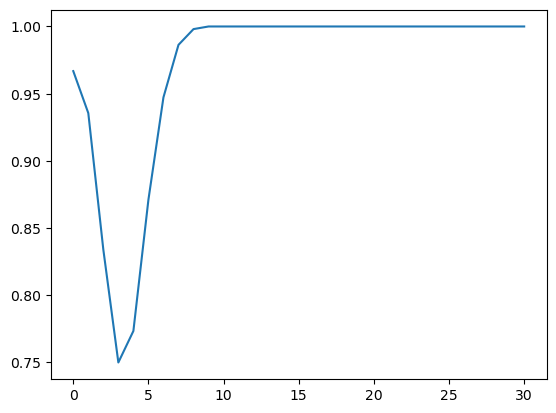

In [4]:
eval_model('awni00/math-algebra__sequence_next_term/model-absurd-snowflake-19:latest', val_ds)

### Transformer - Medium+

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 12s 565ms/step - loss: 0.0546 - teacher_forcing_accuracy: 0.9169
{'loss': 0.05462654307484627, 'teacher_forcing_accuracy': 0.9168969392776489}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.615234375
acc by position

sample of predictions:

Q: What comes next: 929, 1844, 2721, 3560, 4361?
A: 5124;
P: 5124;

Q: What is the next term in 16455, 16432, 16385, 16314, 16219, 16100?
A: 15957;
P: 15957;

Q: What is next in -234, -689, -1352, -2229, -3326?
A: -4649;
P: -4649;

Q: What is the next term in -256831, -256815, -256799, -256783, -256767?
A: -256751;
P: -256751;

Q: What is the next term in 2754, 2831, 3034, 3423, 4058, 4999, 6306, 8039?
A: 10258;
P: 10208;


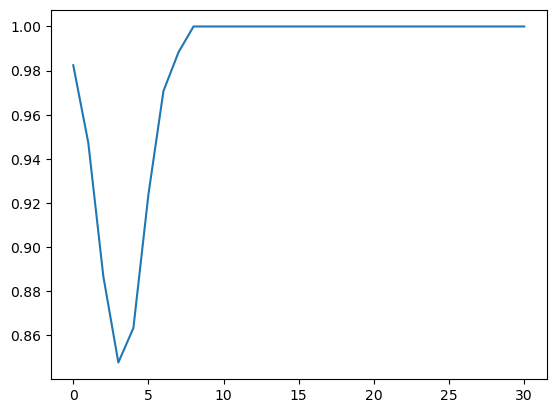

In [15]:
eval_model('awni00/math-algebra__sequence_next_term/model-sleek-deluge-20:latest', val_ds)

### Relational Abstractor - Medium

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 17s 828ms/step - loss: 0.0488 - teacher_forcing_accuracy: 0.9221
{'loss': 0.048819251358509064, 'teacher_forcing_accuracy': 0.9221294522285461}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.65234375
acc by position

sample of predictions:

Q: What is the next term in -83103, -332464, -748069, -1329918, -2078011, -2992348, -4072929?
A: -5319754;
P: -5329754;

Q: What is next in -13011, -12432, -11853, -11274, -10695, -10116?
A: -9537;
P: -9997;

Q: What comes next: 256, 390, 652, 1108, 1824, 2866?
A: 4300;
P: 4290;

Q: What is next in -2045, -8137, -18217, -32225, -50101, -71785, -97217?
A: -126337;
P: -126497;

Q: What is next in 352, 695, 1318, 2221, 3404?
A: 4867;
P: 4867;


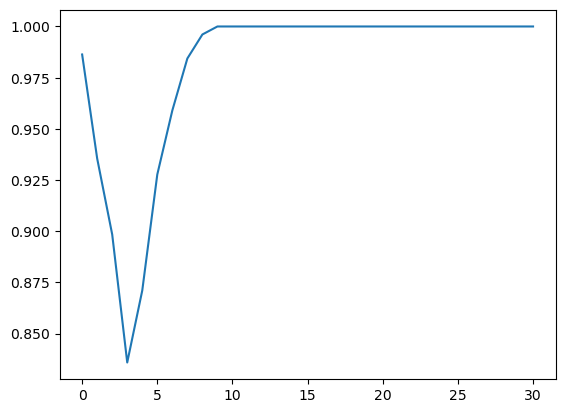

In [8]:
eval_model('awni00/math-algebra__sequence_next_term/model-crisp-totem-16:latest', val_ds)

### Relational Abstractor2 - Medium

In [7]:
# eval_model('awni00/math-algebra__sequence_next_term/model-fresh-snowflake-3:v29', val_ds)

## `algebra__linear_1d`

In [9]:
# region
task = 'algebra__linear_1d'
train_ds, val_ds = load_dataset(task, train_size=-1, batch_size=512)
# endregion

### Transformer - Medium

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 8s 361ms/step - loss: 0.0778 - teacher_forcing_accuracy: 0.7140
{'loss': 0.0778389722108841, 'teacher_forcing_accuracy': 0.7139608263969421}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.271484375
acc by position

sample of predictions:

Q: Solve 701 - 2919 + 402 = -21*a - 829 for a.
A: 47;
P: 117;

Q: Solve 99*w + 1553 = -77*w + 46*w - 1697 for w.
A: -25;
P: -25;

Q: Solve -1275*f - 46076 + 4722 = -554 for f.
A: -32;
P: -32;

Q: Solve 0 = -10872*n + 11663*n - 791 for n.
A: 1;
P: -17;

Q: Solve 344*b - 2654 - 2107 = 7279 for b.
A: 35;
P: 33;


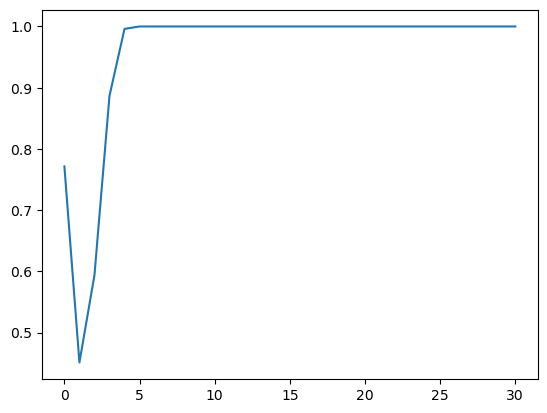

In [10]:
eval_model('awni00/math-algebra__linear_1d/model-sage-cosmos-26:latest', val_ds)

### Relational Abstractor - Medium

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 17s 823ms/step - loss: 0.0556 - teacher_forcing_accuracy: 0.7905
{'loss': 0.05561516061425209, 'teacher_forcing_accuracy': 0.7905270457267761}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.42578125
acc by position

sample of predictions:

Q: Solve 3*g = -55*g + 672542 - 674224 for g.
A: -29;
P: -17;

Q: Solve -527*s - 2346 - 8176 - 8450 = 0 for s.
A: -36;
P: -44;

Q: Solve -470*j + 7505 + 1828 + 2277 = -3430 for j.
A: 32;
P: 32;

Q: Solve 290241 - 292673 = -64*u for u.
A: 38;
P: -38;

Q: Solve 110*x = -10*x + 3790 + 1730 for x.
A: 46;
P: 44;


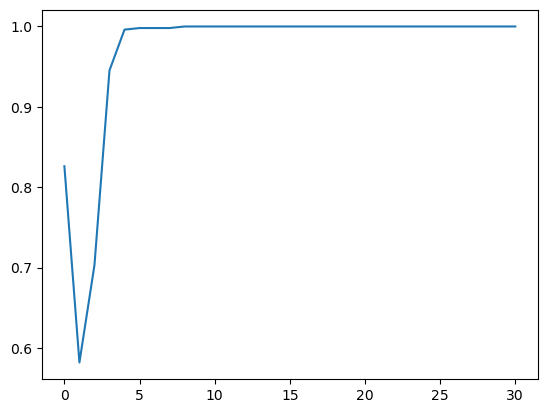

In [11]:
eval_model('awni00/math-algebra__linear_1d/model-exalted-forest-24:latest', val_ds)

### Relational Abstractor2 - Medium

In [16]:
# eval_model('awni00/math-algebra__linear_1d/model-denim-surf-2:latest', val_ds)

## `calculus__differentiate`

In [17]:
# region
task = 'calculus__differentiate'
train_ds, val_ds = load_dataset(task, train_size=-1, batch_size=512)
# endregion

### Transformer - Medium

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 8s 364ms/step - loss: 0.0042 - teacher_forcing_accuracy: 0.9980
{'loss': 0.004193220753222704, 'teacher_forcing_accuracy': 0.9979625344276428}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.986328125
acc by position

sample of predictions:

Q: Find the second derivative of 214*h**2*o**3*z**2 - 11325*h**2*o**2 + h**2*o*z + 8*h**2*o - 16*h*o - h + o*z**2 + 239 wrt o.
A: 1284*h**2*o*z**2 - 22650*h**2;
P: 1284*h**2*o*z**2 - 22650*h**2;

Q: Find the third derivative of -13596227*g**3 + 1861286*g**2.
A: -81577362;
P: -81577362;

Q: Find the third derivative of 10*d**5 + 179365*d**3 - 2892*d**2 + 270*d wrt d.
A: 600*d**2 + 1076190;
P: 600*d**2 + 1076190;

Q: Find the third derivative of r**4 - 5347891*r**3 - 1466*r**2 + 998*r.
A: 24*r - 32087346;
P: 24*r - 32087346;

Q: Find the first derivative of 2*c*q**3 + 1477152*c*q - 21*q**3 - 14830 wrt c.
A: 2*q**3 + 1477152*q;
P: 2*q**3 + 1477152*q;


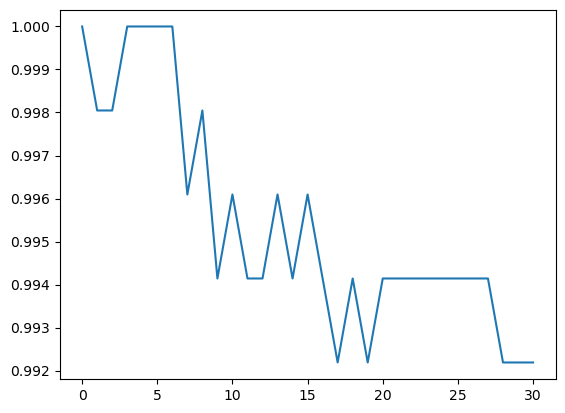

In [18]:
eval_model('awni00/math-calculus__differentiate/model-unique-frost-20:latest', val_ds)

### Relational Transformer - Medium+

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 12s 578ms/step - loss: 0.0031 - teacher_forcing_accuracy: 0.9985
{'loss': 0.0031087594106793404, 'teacher_forcing_accuracy': 0.9984651207923889}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.98046875
acc by position

sample of predictions:

Q: Differentiate -215*c*y**3 + 5*c*y**2 - 366*c + 513*y**3 - 138*y - 2 wrt c.
A: -215*y**3 + 5*y**2 - 366;
P: -215*y**3 + 5*y**2 - 366;

Q: Find the second derivative of -3502*s**5 - 407*s**4 + s**3 - 2593052*s.
A: -70040*s**3 - 4884*s**2 + 6*s;
P: -70040*s**3 - 4884*s**2 + 6*s;

Q: What is the second derivative of -7*l**4 - 307*l**3 + 114*l**2 - 7*l + 300356?
A: -84*l**2 - 1842*l + 228;
P: -84*l**2 - 1842*l + 228;

Q: What is the first derivative of -7837970*q + 7911205?
A: -7837970;
P: -7837970;

Q: What is the second derivative of -15707226*f**2 - 1268192*f?
A: -31414452;
P: -31414452;


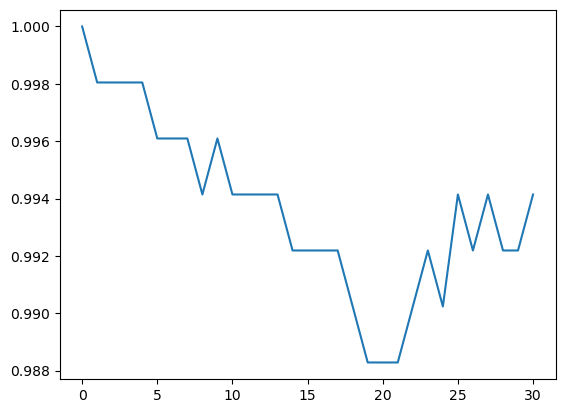

In [21]:
eval_model('awni00/math-calculus__differentiate/model-whole-wildflower-21:latest', val_ds)

### Relational Abstractor - Medium

wandb:   5 of 5 files downloaded.  


evaluation on val_ds
20/20 [==============================] - 17s 844ms/step - loss: 6.2451e-04 - teacher_forcing_accuracy: 0.9996
{'loss': 0.0006245070253498852, 'teacher_forcing_accuracy': 0.9996379017829895}

evaluating full-sequence accuracy on a single batch of size 512
full_seq_acc: 0.998046875
acc by position

sample of predictions:

Q: What is the second derivative of 2154832*t**3 + 554310*t - 10 wrt t?
A: 12928992*t;
P: 12928992*t;

Q: What is the third derivative of -21*s**4*t + 25725*s**3*t*w + 4*s**2*t*w - 2*s**2*t + 54*s*w + t*w + 12*t - 3 wrt s?
A: -504*s*t + 154350*t*w;
P: -504*s*t + 154350*t*w;

Q: Find the second derivative of 345*o**5 - 117*o**4 - 44*o**3 - 12350010*o.
A: 6900*o**3 - 1404*o**2 - 264*o;
P: 6900*o**3 - 1404*o**2 - 264*o;

Q: What is the third derivative of -b**5 + 308*b**4 - 2434*b**3 + 46*b**2 - 56*b - 67?
A: -60*b**2 + 7392*b - 14604;
P: -60*b**2 + 7392*b - 14604;

Q: Find the second derivative of -14125*c**3*f**2*t - 3*c**3*f - 2*c**3*t - c**2*f*t + 

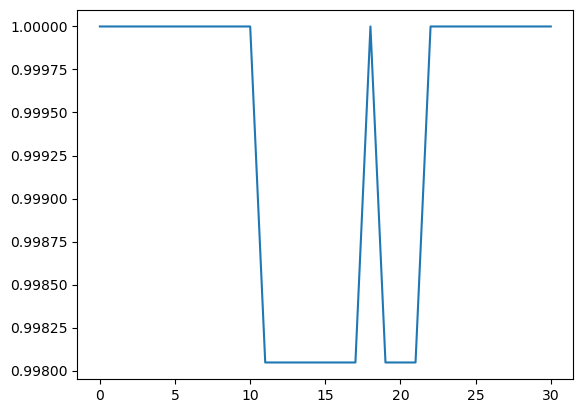

In [19]:
eval_model('awni00/math-calculus__differentiate/model-devoted-snowflake-17:latest', val_ds)

### Relational Abstractor2 - Medium

In [20]:
# eval_model('awni00/math-calculus__differentiate/model-iconic-night-3:latest', val_ds)